In [1]:


#Lets import some stuff!
import boto
from boto.s3.connection import S3Connection
from datetime import timedelta, datetime
import os
#import pyart
from matplotlib import pyplot as plt
import tempfile
import numpy as np

%matplotlib inline



In [2]:
#first lets connect to the bucket
conn = S3Connection(anon = True)
bucket = conn.get_bucket('noaa-nexrad-level2')

In [3]:
#as we can see there is a LOT we can do with a bucket!!!
dir(bucket)

['BucketPaymentBody',
 'LoggingGroup',
 'MFADeleteRE',
 'VersionRE',
 'VersioningBody',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_delete_key_internal',
 '_get_all',
 '_get_all_query_args',
 '_get_key_internal',
 'add_email_grant',
 'add_user_grant',
 'cancel_multipart_upload',
 'complete_multipart_upload',
 'configure_lifecycle',
 'configure_versioning',
 'configure_website',
 'connection',
 'copy_key',
 'delete',
 'delete_cors',
 'delete_key',
 'delete_keys',
 'delete_lifecycle_configuration',
 'delete_policy',
 'delete_tags',
 'delete_website_configuration',
 'disable_logging',
 'enable_logging',
 'endElement',
 'generate_url',
 

In [4]:
my_list = bucket.list()
help(my_list)

Help on BucketListResultSet in module boto.s3.bucketlistresultset object:

class BucketListResultSet(builtins.object)
 |  BucketListResultSet(bucket=None, prefix='', delimiter='', marker='', headers=None, encoding_type=None)
 |  
 |  A resultset for listing keys within a bucket.  Uses the bucket_lister
 |  generator function and implements the iterator interface.  This
 |  transparently handles the results paging from S3 so even if you have
 |  many thousands of keys within the bucket you can iterate over all
 |  keys in a reasonably efficient manner.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, bucket=None, prefix='', delimiter='', marker='', headers=None, encoding_type=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


In [5]:
my_pref = '2011/05/20/KVNX/'
bucket_list = list(bucket.list(prefix = my_pref))

In [8]:

bucket_list[0].get_contents_to_filename('C:/Users/mohap/Desktop/ADS Project/tempdata')

In [17]:
import pyart
radar = pyart.io.read(os.path.join('C:/Users/mohap/Desktop/ADS Project/tempdata'))


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [18]:
print(radar.info())

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (8280,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (8280,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	differential_phase:
		data: <ndarray of type: float32 and shape: (8280, 1832)>
		units: degrees
		standard_name: differential_phase_hv
		long_name: differential_phase_hv
		valid_max: 360.0
		valid_min: 0.0
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	differential_reflectivity:
		data: <nd

In [23]:
dir(radar)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_sweep_in_range',
 '_dic_info',
 'add_field',
 'add_field_like',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'check_field_exists',
 'drift',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'gate_altitude',
 'gate_latitude',
 'gate_longitude',
 'gate_x',
 'gate_y',
 'gate_z',
 'georefs_applied',
 'get_azimuth',
 'get_elevation',
 'get_end',
 'get_field',
 'get_gate_area',
 'get_gate_lat_lon_alt',
 'get_gate_x_y_z',
 'get_nyquist_vel',
 'get_slice',
 'get_start',
 'get_start_end',
 'heading',
 'info',
 'init_gate_altitude',
 'init_gate_longitude_lat

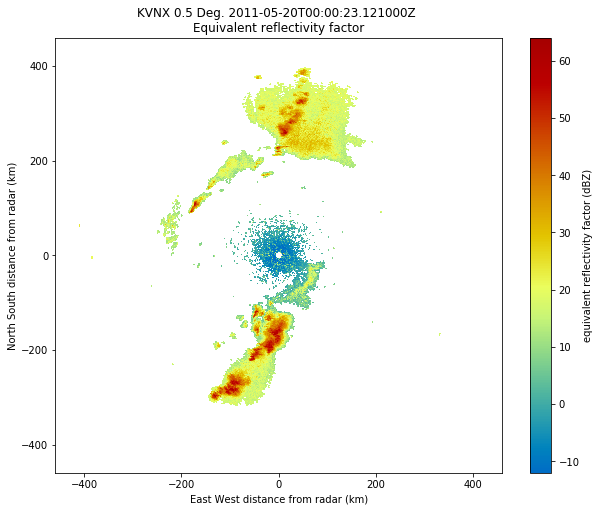

In [24]:
my_figure = plt.figure(figsize = [10,8])
my_display = pyart.graph.RadarDisplay(radar)
my_display.plot_ppi('reflectivity', 0, vmin = -12, vmax = 64)